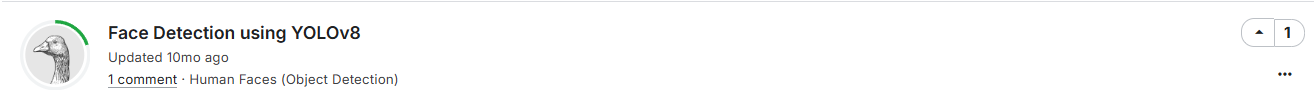

In [1]:
import numpy as np
import pandas as pd

In [2]:
import os
import shutil
import random

def split_data(source_dir, train_dir, val_dir, split_ratio=(0.9, 0.1)):
    # Create directories if they don't exist
    for directory in [train_dir, val_dir]:
        if not os.path.exists(directory):
            os.makedirs(directory)

    # Get list of all files in the source directory
    files = os.listdir(source_dir)
    # Shuffle the files
    random.shuffle(files)

    # Calculate split indices
    total_files = len(files)
    train_split = int(total_files * split_ratio[0])

    # Split files into train, val, and test sets
    train_files = files[:train_split]
    val_files = files[train_split:]

    # Copy files to respective directories
    for file in train_files:
        shutil.copy(os.path.join(source_dir, file), os.path.join(train_dir, file))
    for file in val_files:
        shutil.copy(os.path.join(source_dir, file), os.path.join(val_dir, file))

# Example usage
source_directory = r'D:\code_study\ML_CODE\dataSets\ObjectDetection\Human_Faces_Object_Detection\archive\images'
source_directory = source_directory.replace('\\', '/')
train_directory = './images/train'
val_directory = './images/val'

split_data(source_directory, train_directory, val_directory)

In [3]:
df=pd.read_csv(r'D:\code_study\ML_CODE\dataSets\ObjectDetection\Human_Faces_Object_Detection\archive\faces.csv')
df['class'] = 'human'
df.columns = ['filename','width','height','xmin','ymin','xmax','ymax','class']
df = df[['filename','class','width', 'height','xmin','ymin','xmax','ymax']]

In [4]:
labels_dir = './labels'

# Create the labels directory if it doesn't exist
if not os.path.exists(labels_dir):
    os.makedirs(labels_dir)

# Subdirectories within labels directory
train_dir = os.path.join(labels_dir, 'train')
val_dir = os.path.join(labels_dir, 'val')

# Create train, val, and test directories within labels directory
for directory in [train_dir, val_dir]:
    if not os.path.exists(directory):
        os.makedirs(directory)

In [5]:
train_dir = './images/train'
val_dir = './images/val'

# Function to get filenames in a directory
def get_filenames_in_dir(directory):
    return set(os.listdir(directory))

# Get filenames in each directory
train_filenames = get_filenames_in_dir(train_dir)
val_filenames = get_filenames_in_dir(val_dir)

# Filter DataFrame based on filenames
train_df = df[df['filename'].isin(train_filenames)]
val_df = df[df['filename'].isin(val_filenames)]

In [6]:
def convert_to_yolo(df, output_dir):
    # Create the output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Function to convert bounding box coordinates to YOLO format
    def convert_to_yolo_format(width, height, xmin, ymin, xmax, ymax):
        x_center = (xmin + xmax) / (2 * width)
        y_center = (ymin + ymax) / (2 * height)
        box_width = (xmax - xmin) / width
        box_height = (ymax - ymin) / height
        return x_center, y_center, box_width, box_height

    # Loop over the DataFrame and create YOLO format .txt files
    for index, row in df.iterrows():
        filename = row['filename']
        width = row['width']
        height = row['height']
        xmin = row['xmin']
        ymin = row['ymin']
        xmax = row['xmax']
        ymax = row['ymax']

        x_center, y_center, box_width, box_height = convert_to_yolo_format(width, height, xmin, ymin, xmax, ymax)

        # Write YOLO format data to a .txt file
        output_file = os.path.join(output_dir, os.path.splitext(filename)[0] + ".txt")
        with open(output_file, 'w') as f:
            f.write(f"0 {x_center} {y_center} {box_width} {box_height}\n")

    print("YOLO format .txt files created successfully.")


convert_to_yolo(val_df, './labels/val')
convert_to_yolo(train_df, './labels/train')

YOLO format .txt files created successfully.
YOLO format .txt files created successfully.


In [7]:
import yaml

data = {
    'train': './images/train',
    'val': './images/val',
    'nc': 1,
    'names': {
        '0': 'human'
    }
}

with open('data.yaml', 'w') as file:
    yaml.dump(data, file, default_flow_style=False)

print("YAML file 'data.yaml' created successfully.")

YAML file 'data.yaml' created successfully.


In [8]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

from ultralytics import YOLO

from IPython.display import display, Image

Ultralytics 8.3.65  Python-3.9.21 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce GTX 1660 SUPER, 6144MiB)
Setup complete  (20 CPUs, 31.8 GB RAM, 920.5/931.5 GB disk)


In [12]:
model = YOLO('yolov8n.pt')

results = model.train(data='D:\code_study\ML_CODE\kaggle\ObjectDetection\Human Faces Object Detection\Face Detection using YOLO\data.yaml', epochs=30,imgsz=320,batch=16, patience=5)

Ultralytics 8.3.65  Python-3.9.21 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce GTX 1660 SUPER, 6144MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=D:\code_study\ML_CODE\kaggle\ObjectDetection\Human Faces Object Detection\Face Detection using YOLO\data.yaml, epochs=30, time=None, patience=5, batch=16, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=F

train: Scanning D:\code_study\ML_CODE\kaggle\ObjectDetection\Human Faces Object Detection\Face Detection using YOLO\labels\train... 2202 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2202/2202 [00:02<00:00, 747.30it/s]


train: New cache created: D:\code_study\ML_CODE\kaggle\ObjectDetection\Human Faces Object Detection\Face Detection using YOLO\labels\train.cache


val: Scanning D:\code_study\ML_CODE\kaggle\ObjectDetection\Human Faces Object Detection\Face Detection using YOLO\labels\val... 593 images, 0 backgrounds, 0 corrupt: 100%|██████████| 593/593 [00:00<00:00, 821.33it/s] 

val: New cache created: D:\code_study\ML_CODE\kaggle\ObjectDetection\Human Faces Object Detection\Face Detection using YOLO\labels\val.cache


Plotting labels to runs\detect\train6\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 320 train, 320 val
Using 8 dataloader workers
Logging results to runs\detect\train6
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      1.07G      1.759      2.079       1.55         27        320: 100%|██████████| 138/138 [00:12<00:00, 10.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.41it/s]


                   all        593        593      0.415      0.681      0.483       0.22

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      1.12G      1.577      1.588      1.422         16        320: 100%|██████████| 138/138 [00:11<00:00, 12.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00,  9.60it/s]

                   all        593        593      0.562      0.695      0.652      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      1.08G      1.571      1.468      1.424         21        320: 100%|██████████| 138/138 [00:10<00:00, 12.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00,  9.52it/s]

                   all        593        593      0.694       0.71      0.759      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      1.12G      1.522      1.385      1.417         20        320: 100%|██████████| 138/138 [00:11<00:00, 12.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00,  9.52it/s]

                   all        593        593      0.813      0.666      0.807      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      1.08G      1.479      1.335      1.397         24        320: 100%|██████████| 138/138 [00:10<00:00, 12.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00,  9.85it/s]

                   all        593        593      0.746      0.659       0.77      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      1.12G      1.439      1.268      1.371         18        320: 100%|██████████| 138/138 [00:10<00:00, 12.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00,  9.87it/s]

                   all        593        593      0.811      0.761      0.862       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      1.08G      1.404      1.233      1.353         22        320: 100%|██████████| 138/138 [00:10<00:00, 12.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00,  9.88it/s]

                   all        593        593      0.773      0.747       0.83      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      1.12G      1.382      1.196      1.337         19        320: 100%|██████████| 138/138 [00:11<00:00, 12.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00,  9.61it/s]

                   all        593        593      0.728      0.749      0.818      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      1.08G      1.347      1.158      1.311         17        320: 100%|██████████| 138/138 [00:10<00:00, 12.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00,  9.95it/s]

                   all        593        593      0.868      0.745      0.888      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      1.12G      1.332      1.126      1.311         23        320: 100%|██████████| 138/138 [00:10<00:00, 12.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00,  9.87it/s]

                   all        593        593       0.78      0.757      0.843      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      1.08G       1.28      1.075      1.287         20        320: 100%|██████████| 138/138 [00:10<00:00, 12.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00,  9.92it/s]

                   all        593        593      0.873      0.728      0.895      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      1.12G      1.268      1.067      1.266         18        320: 100%|██████████| 138/138 [00:10<00:00, 12.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00,  9.89it/s]

                   all        593        593      0.841      0.777      0.894      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      1.08G      1.263      1.056      1.275         19        320: 100%|██████████| 138/138 [00:10<00:00, 12.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00,  9.96it/s]

                   all        593        593       0.84      0.804       0.88      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      1.12G      1.228      1.019      1.253         22        320: 100%|██████████| 138/138 [00:10<00:00, 12.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00,  9.97it/s]

                   all        593        593       0.91      0.753      0.909      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      1.08G      1.226      1.008      1.249         22        320: 100%|██████████| 138/138 [00:10<00:00, 12.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00,  9.96it/s]

                   all        593        593      0.869      0.793      0.916      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      1.12G      1.196     0.9928      1.235         24        320: 100%|██████████| 138/138 [00:10<00:00, 12.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00,  9.97it/s]

                   all        593        593      0.874      0.766      0.906      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      1.08G      1.188     0.9918      1.235         21        320: 100%|██████████| 138/138 [00:10<00:00, 12.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 10.01it/s]

                   all        593        593      0.879      0.799      0.916      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      1.12G      1.171     0.9525      1.221         24        320: 100%|██████████| 138/138 [00:10<00:00, 12.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00,  9.89it/s]

                   all        593        593      0.886        0.8      0.925      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      1.08G      1.171     0.9398      1.214         18        320: 100%|██████████| 138/138 [00:10<00:00, 12.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 10.03it/s]

                   all        593        593      0.908      0.791      0.926      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      1.12G      1.153     0.9284      1.218         17        320: 100%|██████████| 138/138 [00:10<00:00, 12.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 10.04it/s]

                   all        593        593      0.933      0.792      0.932      0.684


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      1.08G      1.042     0.7785      1.184         10        320: 100%|██████████| 138/138 [00:11<00:00, 12.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00,  9.92it/s]

                   all        593        593      0.915      0.798      0.933      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      1.12G      1.012     0.7214      1.171         10        320: 100%|██████████| 138/138 [00:10<00:00, 12.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 10.12it/s]

                   all        593        593      0.933      0.794      0.936      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      1.08G      1.001     0.6912      1.161         10        320: 100%|██████████| 138/138 [00:10<00:00, 12.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 10.08it/s]

                   all        593        593       0.91        0.8      0.936      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      1.12G     0.9642     0.6841      1.144         10        320: 100%|██████████| 138/138 [00:10<00:00, 12.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 10.08it/s]

                   all        593        593      0.893      0.806      0.933      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      1.08G     0.9524      0.669      1.124         10        320: 100%|██████████| 138/138 [00:10<00:00, 12.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 10.01it/s]

                   all        593        593      0.917      0.818      0.948        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      1.12G     0.9216     0.6581      1.105         10        320: 100%|██████████| 138/138 [00:10<00:00, 12.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 10.01it/s]

                   all        593        593      0.945      0.809      0.952      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      1.08G       0.91      0.633      1.109         10        320: 100%|██████████| 138/138 [00:10<00:00, 12.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 10.02it/s]

                   all        593        593       0.96      0.802      0.955      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      1.12G     0.8886     0.6285      1.089         10        320: 100%|██████████| 138/138 [00:10<00:00, 12.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 10.03it/s]

                   all        593        593      0.943      0.804      0.953      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      1.08G     0.8785     0.6172      1.084         10        320: 100%|██████████| 138/138 [00:10<00:00, 12.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 10.07it/s]

                   all        593        593      0.919       0.84      0.957      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      1.12G     0.8505     0.5999      1.071         10        320: 100%|██████████| 138/138 [00:10<00:00, 12.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00,  9.99it/s]

                   all        593        593      0.913       0.85      0.957      0.714



30 epochs completed in 0.115 hours.
Optimizer stripped from runs\detect\train6\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train6\weights\best.pt, 6.2MB

Validating runs\detect\train6\weights\best.pt...
Ultralytics 8.3.65  Python-3.9.21 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce GTX 1660 SUPER, 6144MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.96it/s]


                   all        593        593       0.96      0.802      0.955      0.726
Speed: 0.1ms preprocess, 0.8ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs\detect\train6


In [13]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

testmodel = YOLO("./runs/detect/train/weights/best.pt")

def drawbox(image_path):
    img = Image.open(image_path)
    results = testmodel.predict(img)

    fig, ax = plt.subplots(1)
    ax.imshow(img)  # Display the image

    # Loop through all detections
    for r in results:
        # Assuming r.boxes contains all boxes for this particular result, iterate through them
        for box in r.boxes.data.tolist():
            xmin, ymin, xmax, ymax, conf, cls_id = box
            conf = round(conf, 2)
            # Create a Rectangle patch
            rect = patches.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
            # Annotate the image with confidence
            ax.text(xmin, ymin, f'Conf: {conf}', bbox=dict(facecolor='white', alpha=0.5))

    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'runs\\detect\\train\\weights\\best.pt'

In [ ]:
drawbox('/kaggle/input/human-faces-object-detection/images/00000031.jpg')